In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import mutual_info_classif for feature selection
from sklearn.feature_selection import mutual_info_classif

# Import pickle to save/load Python objects
import pickle

# Import os for file system operations
import os

#Import some utilities of sklearn to compare algorithms
from sklearn.model_selection import cross_val_predict,train_test_split,cross_val_score
from sklearn import linear_model,model_selection
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,roc_curve,confusion_matrix

## **IMPORT DATASET**

In [2]:
df = pd.read_csv('DATA_FRAUD_PREDICTION.csv')

In [3]:
df.head()

,CRM_Channel,Customer_ID,Is_Diff_Dob,Is_Diff_Gender,Is_Diff_Nationality,AGE_Group,OCR_Gender,Nationality,SCORE_Sanity,SCORE_Tampering,SCORE_Liveness,SCORE_Matching,Trans_Count,Total_Amount_Group,DT_to_EKYC,DT_to_Cre_Acc,DT_to_Make_1stTrns,LABEL
0,Partnership,710785,NO,NO,NO,30-33,M,VIETNAMESE,0.99,0.99,0.90,0.98,0,NO TRANS,12,1000,1000,NORMAL
1,Digital Direct Sale,522800,NO,NO,NO,30-33,F,VIETNAMESE,0.97,0.97,0.97,0.95,0,NO TRANS,18,1,1000,NORMAL
2,Partnership,268010,NO,NO,NO,30-33,F,VIETNAMESE,0.92,0.91,0.85,0.90,0,NO TRANS,63,9,1000,NORMAL
3,Digital Direct Sale,539362,NO,NO,NO,34+,M,VIETNAMESE,0.87,0.97,0.95,0.95,0,NO TRANS,9,1,1000,NORMAL
4,Ecosystem,313152,NO,NO,NO,30-33,M,VIETNAMESE,0.96,0.87,0.90,0.95,0,NO TRANS,0,0,1000,NORMAL


In [4]:
# Remove the second column: Customer_ID
df = df.drop('Customer_ID', axis=1)

In [5]:
df.head(5)

,CRM_Channel,Is_Diff_Dob,Is_Diff_Gender,Is_Diff_Nationality,AGE_Group,OCR_Gender,Nationality,SCORE_Sanity,SCORE_Tampering,SCORE_Liveness,SCORE_Matching,Trans_Count,Total_Amount_Group,DT_to_EKYC,DT_to_Cre_Acc,DT_to_Make_1stTrns,LABEL
0,Partnership,NO,NO,NO,30-33,M,VIETNAMESE,0.99,0.99,0.90,0.98,0,NO TRANS,12,1000,1000,NORMAL
1,Digital Direct Sale,NO,NO,NO,30-33,F,VIETNAMESE,0.97,0.97,0.97,0.95,0,NO TRANS,18,1,1000,NORMAL
2,Partnership,NO,NO,NO,30-33,F,VIETNAMESE,0.92,0.91,0.85,0.90,0,NO TRANS,63,9,1000,NORMAL
3,Digital Direct Sale,NO,NO,NO,34+,M,VIETNAMESE,0.87,0.97,0.95,0.95,0,NO TRANS,9,1,1000,NORMAL
4,Ecosystem,NO,NO,NO,30-33,M,VIETNAMESE,0.96,0.87,0.90,0.95,0,NO TRANS,0,0,1000,NORMAL


In [6]:
print("===== General Information (df.info()) =====")
df.info()
print("\n")

===== General Information (df.info()) =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47116 entries, 0 to 47115
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CRM_Channel          47116 non-null  object 
 1   Is_Diff_Dob          47116 non-null  object 
 2   Is_Diff_Gender       47116 non-null  object 
 3   Is_Diff_Nationality  47116 non-null  object 
 4   AGE_Group            47116 non-null  object 
 5   OCR_Gender           47116 non-null  object 
 6   Nationality          47116 non-null  object 
 7   SCORE_Sanity         47116 non-null  float64
 8   SCORE_Tampering      47116 non-null  float64
 9   SCORE_Liveness       47116 non-null  float64
 10  SCORE_Matching       47116 non-null  float64
 11  Trans_Count          47116 non-null  int64  
 12  Total_Amount_Group   47116 non-null  object 
 13  DT_to_EKYC           47116 non-null  int64  
 14  DT_to_Cre_Acc        47116 non-null  int64

In [7]:
print("===== Descriptive Statistics (df.describe()) =====")
print(df.describe())
print("\n")

===== Descriptive Statistics (df.describe()) =====
       SCORE_Sanity  SCORE_Tampering  SCORE_Liveness  SCORE_Matching  \
count  47116.000000     47116.000000    47116.000000    47116.000000   
mean       0.903352         0.903834        0.903591        0.904463   
std        0.121311         0.119827        0.120775        0.119321   
min        0.000000         0.000000        0.000000        0.000000   
25%        0.880000         0.880000        0.880000        0.880000   
50%        0.920000         0.920000        0.920000        0.920000   
75%        0.960000         0.960000        0.960000        0.960000   
max        1.000000         1.000000        1.000000        1.000000   

        Trans_Count    DT_to_EKYC  DT_to_Cre_Acc  DT_to_Make_1stTrns  
count  47116.000000  47116.000000   47116.000000        47116.000000  
mean       0.296375     45.694032     332.176182          744.691018  
std        0.535910     53.287211     455.478802          431.278715  
min        0.000

In [8]:
print("===== Dataset Dimensions (df.shape) =====")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

===== Dataset Dimensions (df.shape) =====
Number of rows: 47116
Number of columns: 17


## **SPLIT THE HOLD-OUT SET**


First, I extract 1% of the data to serve as the final testing set for the model, which is also known as an inference step:

In [9]:
used_to_build_set, holdout_set = train_test_split(df, test_size=0.01, stratify=df['LABEL'], random_state=42)

- When splitting the dataset into training and hold-out sets, it is essential to preserve the original distribution of labels (especially in my classification tasks where data may be imbalanced). And **stratified sampling** meet a requirement.
- Instead of randomly splitting the data, stratified sampling ensures that the **proportion of each class label is maintained** in both the training and hold-out sets. This leads to a more reliable evaluation of the model and prevents biased performance due to unrepresentative splits.

In [10]:
print("===== Dataset Dimensions (holdout_set.shape) =====")
print(f"Number of rows: {holdout_set.shape[0]}")
print(f"Number of columns: {holdout_set.shape[1]}")

===== Dataset Dimensions (holdout_set.shape) =====
Number of rows: 472
Number of columns: 17


In [11]:
df = used_to_build_set

## **DATA PREPROCESSING**

 ### ***ENCODING***

In [12]:
columns = df.columns
num_columns = df.select_dtypes(include=['int','float']).columns.to_list()
cat_columns = (columns.difference(num_columns))

# Print the number of columns in the dataframe
print('Numerics:', num_columns)
print('Categorical:', cat_columns)

Numerics: ['SCORE_Sanity', 'SCORE_Tampering', 'SCORE_Liveness', 'SCORE_Matching', 'Trans_Count', 'DT_to_EKYC', 'DT_to_Cre_Acc', 'DT_to_Make_1stTrns']
Categorical: Index(['AGE_Group', 'CRM_Channel', 'Is_Diff_Dob', 'Is_Diff_Gender',
       'Is_Diff_Nationality', 'LABEL', 'Nationality', 'OCR_Gender',
       'Total_Amount_Group'],
      dtype='object')


 ***Categorical Encoder***

The Binary Cloumns include:

- Is_Diff_Dob
- Is_Diff_Gender
- Is_Diff_Nationality
- OCR_Gender
- Nationality
- LABEL

In [13]:
bin_columns = ['Is_Diff_Dob', 'Is_Diff_Gender', 'Is_Diff_Nationality', 'OCR_Gender', 'Nationality', 'LABEL']
df[bin_columns].head(5)

,Is_Diff_Dob,Is_Diff_Gender,Is_Diff_Nationality,OCR_Gender,Nationality,LABEL
11334,NO,NO,NO,M,VIETNAMESE,NORMAL
11921,NO,NO,NO,M,VIETNAMESE,NORMAL
9278,NO,NO,NO,M,OTHER,NORMAL
42396,NO,NO,NO,F,VIETNAMESE,NORMAL
6314,NO,NO,NO,F,VIETNAMESE,NORMAL


In [14]:
# Check the values in bin_columns
for col in bin_columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'Is_Diff_Dob': ['NO']
Unique values in column 'Is_Diff_Gender': ['NO']
Unique values in column 'Is_Diff_Nationality': ['NO']
Unique values in column 'OCR_Gender': ['M' 'F']
Unique values in column 'Nationality': ['VIETNAMESE' 'OTHER']
Unique values in column 'LABEL': ['NORMAL' 'FRAUD']


The three variables `Is_Diff_Dob`, `Is_Diff_Gender`, and `Is_Diff_Nationality` each contain only a single value: NO (encoded as 0). Since there is no variation in these features, they do not provide any discriminatory power for the machine learning model. Therefore, it is recommended to remove these columns from the dataset to reduce noise and improve training efficiency.

In [15]:
cols_to_drop = ['Is_Diff_Dob', 'Is_Diff_Gender', 'Is_Diff_Nationality']
df = df.drop(columns=cols_to_drop)

In [16]:
df.head(5)

,CRM_Channel,AGE_Group,OCR_Gender,Nationality,SCORE_Sanity,SCORE_Tampering,SCORE_Liveness,SCORE_Matching,Trans_Count,Total_Amount_Group,DT_to_EKYC,DT_to_Cre_Acc,DT_to_Make_1stTrns,LABEL
11334,RB,34+,M,VIETNAMESE,0.94,0.94,0.86,1.00,2,HIGH,12,3,15,NORMAL
11921,Digital Direct Sale,22-25,M,VIETNAMESE,0.93,0.87,0.87,0.92,0,NO TRANS,2,3,1000,NORMAL
9278,Ecosystem,26-29,M,OTHER,0.94,0.87,0.95,0.99,0,NO TRANS,16,1000,1000,NORMAL
42396,Partnership,30-33,F,VIETNAMESE,0.94,0.89,0.98,0.89,1,MEDIUM HIGH,64,5,64,NORMAL
6314,Digital Direct Sale,22-25,F,VIETNAMESE,0.90,0.96,0.86,0.93,0,NO TRANS,80,1000,1000,NORMAL


In [17]:
bin_columns = ['OCR_Gender', 'Nationality', 'LABEL']
df[bin_columns].head(5)

,OCR_Gender,Nationality,LABEL
11334,M,VIETNAMESE,NORMAL
11921,M,VIETNAMESE,NORMAL
9278,M,OTHER,NORMAL
42396,F,VIETNAMESE,NORMAL
6314,F,VIETNAMESE,NORMAL


In [18]:
replace_dict = {
    'Nationality': {'OTHER': 1, 'VIETNAMESE': 0},
    'LABEL': {'FRAUD': 1, 'NORMAL': 0},
    'OCR_Gender': {'M': 1, 'F': 0}
}

# Replace values in the specified columns
for col in replace_dict:
    df[col] = df[col].replace(replace_dict[col])

# Rename columns
df = df.rename(columns={
    'Nationality': 'Is_Foreign',
    'LABEL': 'Is_Fraud',
    'OCR_Gender': 'Is_Male'
})

/tmp/ipython-input-18-820670787.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(replace_dict[col])


In [19]:
df.head(5)

,CRM_Channel,AGE_Group,Is_Male,Is_Foreign,SCORE_Sanity,SCORE_Tampering,SCORE_Liveness,SCORE_Matching,Trans_Count,Total_Amount_Group,DT_to_EKYC,DT_to_Cre_Acc,DT_to_Make_1stTrns,Is_Fraud
11334,RB,34+,1,0,0.94,0.94,0.86,1.00,2,HIGH,12,3,15,0
11921,Digital Direct Sale,22-25,1,0,0.93,0.87,0.87,0.92,0,NO TRANS,2,3,1000,0
9278,Ecosystem,26-29,1,1,0.94,0.87,0.95,0.99,0,NO TRANS,16,1000,1000,0
42396,Partnership,30-33,0,0,0.94,0.89,0.98,0.89,1,MEDIUM HIGH,64,5,64,0
6314,Digital Direct Sale,22-25,0,0,0.90,0.96,0.86,0.93,0,NO TRANS,80,1000,1000,0


The Ordinal Columns include:

- Total_Amount_Group
- AGE_Group

In [20]:
print(df['Total_Amount_Group'].unique())
print(df['AGE_Group'].unique())

['HIGH' 'NO TRANS' 'MEDIUM HIGH' 'LOW' 'MEDIUM LOW']
['34+' '22-25' '26-29' '30-33' '21-']


In [21]:
or_columns = ['AGE_Group', 'Total_Amount_Group']
df[or_columns].head(100)

,AGE_Group,Total_Amount_Group
11334,34+,HIGH
11921,22-25,NO TRANS
9278,26-29,NO TRANS
42396,30-33,MEDIUM HIGH
6314,22-25,NO TRANS
...,...,...
1311,34+,NO TRANS
37008,30-33,LOW
18673,22-25,MEDIUM LOW
24240,30-33,NO TRANS


In [22]:
# Encode Total_Amount_Group with a custom order
total_amount_categories = ['NO TRANS', 'LOW', 'MEDIUM LOW', 'MEDIUM HIGH', 'HIGH']
df['Total_Amount_Group'] = df['Total_Amount_Group'].astype('category')
df['Total_Amount_Group'] = df['Total_Amount_Group'].cat.set_categories(total_amount_categories, ordered=True)
df['Total_Amount_Group'] = df['Total_Amount_Group'].cat.codes

# Encode AGE_Group in ascending order of age
age_group_categories = ['21-', '22-25', '26-29', '30-33', '34+']
df['AGE_Group'] = df['AGE_Group'].astype('category')
df['AGE_Group'] = df['AGE_Group'].cat.set_categories(age_group_categories, ordered=True)
df['AGE_Group'] = df['AGE_Group'].cat.codes

In [23]:
print("Total_Amount_Group_Encoded:", df['Total_Amount_Group'].unique())
print("AGE_Group_Encoded:", df['AGE_Group'].unique())

Total_Amount_Group_Encoded: [4 0 3 1 2]
AGE_Group_Encoded: [4 1 2 3 0]


In [24]:
# Check the values
or_columns = ['AGE_Group', 'Total_Amount_Group']
df[or_columns].head(100)

,AGE_Group,Total_Amount_Group
11334,4,4
11921,1,0
9278,2,0
42396,3,3
6314,1,0
...,...,...
1311,4,0
37008,3,1
18673,1,2
24240,3,0


In [25]:
df.head(5)

,CRM_Channel,AGE_Group,Is_Male,Is_Foreign,SCORE_Sanity,SCORE_Tampering,SCORE_Liveness,SCORE_Matching,Trans_Count,Total_Amount_Group,DT_to_EKYC,DT_to_Cre_Acc,DT_to_Make_1stTrns,Is_Fraud
11334,RB,4,1,0,0.94,0.94,0.86,1.00,2,4,12,3,15,0
11921,Digital Direct Sale,1,1,0,0.93,0.87,0.87,0.92,0,0,2,3,1000,0
9278,Ecosystem,2,1,1,0.94,0.87,0.95,0.99,0,0,16,1000,1000,0
42396,Partnership,3,0,0,0.94,0.89,0.98,0.89,1,3,64,5,64,0
6314,Digital Direct Sale,1,0,0,0.90,0.96,0.86,0.93,0,0,80,1000,1000,0


One-hot Encoding for CRM_Channel Columns:
- Digital Direct Sale
- Ecosystem
- Partnership
- RB
- Telesale

In [26]:
# Create one-hot encoding for CRM_Channel
df_encoded = pd.get_dummies(df['CRM_Channel'])

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Add one-hot encoded columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original CRM_Channel column
df = df.drop('CRM_Channel', axis=1)

In [27]:
df.head(5)

,AGE_Group,Is_Male,Is_Foreign,SCORE_Sanity,SCORE_Tampering,SCORE_Liveness,SCORE_Matching,Trans_Count,Total_Amount_Group,DT_to_EKYC,DT_to_Cre_Acc,DT_to_Make_1stTrns,Is_Fraud,Digital Direct Sale,Ecosystem,Partnership,RB,Telesale
11334,4,1,0,0.94,0.94,0.86,1.00,2,4,12,3,15,0,0,0,0,1,0
11921,1,1,0,0.93,0.87,0.87,0.92,0,0,2,3,1000,0,1,0,0,0,0
9278,2,1,1,0.94,0.87,0.95,0.99,0,0,16,1000,1000,0,0,1,0,0,0
42396,3,0,0,0.94,0.89,0.98,0.89,1,3,64,5,64,0,0,0,1,0,0
6314,1,0,0,0.90,0.96,0.86,0.93,0,0,80,1000,1000,0,1,0,0,0,0


## **EXPLORATORY DATA ANALYSIS**

***Gender with Is_Fraud***

Number of females: 23217
Number of males: 23427
Number of fraudulent females: 1768
Number of fraudulent males: 1749


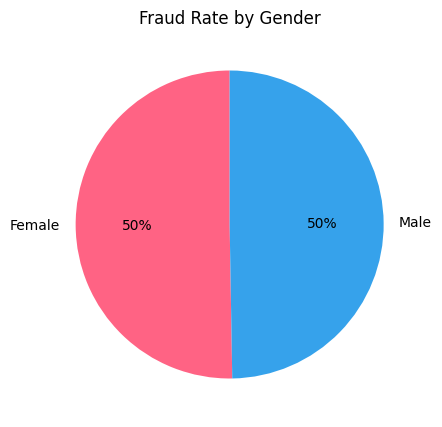

In [28]:
# Count the number of males and females
gender_counts = df['Is_Male'].value_counts()
# Is_Male = 0: Female, Is_Male = 1: Male
female_count = gender_counts.get(0, 0)  # Number of females
male_count = gender_counts.get(1, 0)    # Number of males
total_count = len(df)

# Count the number of fraud cases by gender
female_fraud_count = df[(df['Is_Male'] == 0) & (df['Is_Fraud'] == 1)].shape[0]
male_fraud_count = df[(df['Is_Male'] == 1) & (df['Is_Fraud'] == 1)].shape[0]

# Calculate the proportion of fraud by gender
total_fraud_by_gender = female_fraud_count + male_fraud_count
fraud_gender_counts = [female_fraud_count, male_fraud_count]
fraud_gender_labels = ['Female', 'Male']

# Print the results
print(f"Number of females: {female_count}")
print(f"Number of males: {male_count}")
print(f"Number of fraudulent females: {female_fraud_count}")
print(f"Number of fraudulent males: {male_fraud_count}")

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(fraud_gender_counts, labels=fraud_gender_labels, autopct='%1.0f%%', colors=['#FF6384', '#36A2EB'], startangle=90)
plt.title('Fraud Rate by Gender')
plt.show()

- The results show that the fraud rate between `Males` and `Females` is relatively similar in both proportion and count, with no significant differences. Based on this, gender does not appear to be a strong distinguishing factor for fraudulent behavior.
- This may not affect the predictive model, as the gender variable is likely to have low importance (weight) in the model.

***AGE_Group with Is_Fraud***

Number of fraud cases by AGE_Group:
AGE_Group
0    355
1    867
2    863
3    820
4    612
dtype: int64

Fraud rate (%) by AGE_Group:
AGE_Group
0    7.58
1    7.69
2    7.62
3    7.13
4    7.78
dtype: float64


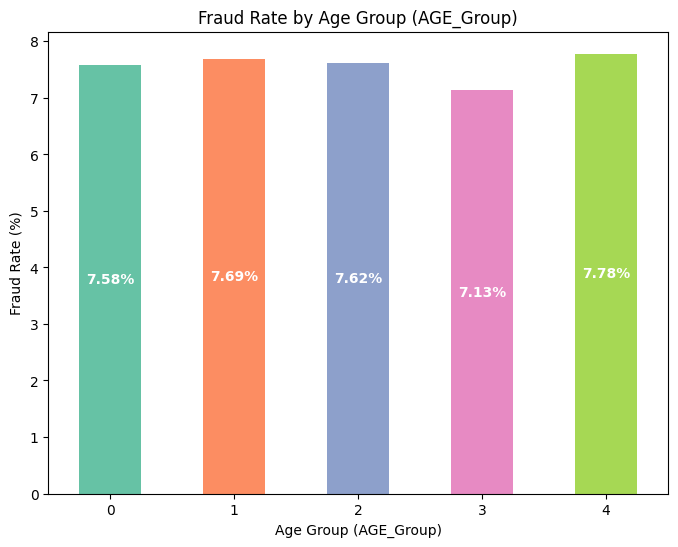

In [29]:
# Calculate the number and percentage of fraud cases by AGE_Group
fraud_by_age = df[df['Is_Fraud'] == 1].groupby('AGE_Group').size()  # Number of fraud cases
total_by_age = df.groupby('AGE_Group').size()  # Total number of records per AGE_Group
fraud_ratio = (fraud_by_age / total_by_age * 100).round(2)  # Fraud rate (%)

# Print the results
print("Number of fraud cases by AGE_Group:")
print(fraud_by_age)
print("\nFraud rate (%) by AGE_Group:")
print(fraud_ratio)

# Plot bar chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Set2", len(fraud_ratio))
fraud_ratio.plot(kind='bar', color=colors)
plt.title('Fraud Rate by Age Group (AGE_Group)')
plt.xlabel('Age Group (AGE_Group)')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=0)

# Display percentage text inside each bar
for i, v in enumerate(fraud_ratio):
    plt.text(i, v / 2, f'{v}%', ha='center', va='center', color='white', fontweight='bold')

plt.show()

- A similar pattern is observed with `AGE_Group`, where the variation in fraud rates across age groups is only 0.65%. There is no clear increasing or decreasing trend, and no specific age group stands out as having significantly higher or lower fraud risk compared to the overall average.
- However, the age groups '22–25' (group 1) and '26–29' (group 2) have the highest number of fraud cases—867 and 863 respectively—which is likely due to these being the largest customer segments.
- Interestingly, the age group over 34 (group 4) has a relatively higher fraud rate compared to other groups, while also having the second-lowest number of fraud cases. This may indicate that this group has a higher individual likelihood of committing fraud.

***Is_Foreign with Is_Fraud***

In [30]:
# Calculate the number and fraud cases by nationality (Is_Foreign)
nationality_counts = df['Is_Foreign'].value_counts()
vietnamese_count = nationality_counts.get(0, 0)  # Number of Vietnamese customers
foreign_count = nationality_counts.get(1, 0)     # Number of foreign customers
total_count = len(df)

fraud_counts = df[df['Is_Fraud'] == 1]['Is_Foreign'].value_counts()
vietnamese_fraud_count = fraud_counts.get(0, 0)  # Number of fraud cases by Vietnamese customers
foreign_fraud_count = fraud_counts.get(1, 0)     # Number of fraud cases by foreign customers

# Calculate fraud rate by nationality
vietnamese_fraud_ratio = (vietnamese_fraud_count / vietnamese_count * 100) if vietnamese_count > 0 else 0
foreign_fraud_ratio = (foreign_fraud_count / foreign_count * 100) if foreign_count > 0 else 0

# Print fraud statistics by nationality
print("Fraud statistics by nationality:")
print(f"Total records: {total_count}")
print(f"Vietnamese: {vietnamese_count}, Fraud cases: {vietnamese_fraud_count}, Fraud rate: {vietnamese_fraud_ratio:.2f}%")
print(f"Foreigners: {foreign_count}, Fraud cases: {foreign_fraud_count}, Fraud rate: {foreign_fraud_ratio:.2f}%")

Fraud statistics by nationality:
Total records: 46644
Vietnamese: 45609, Fraud cases: 3432, Fraud rate: 7.52%
Foreigners: 1035, Fraud cases: 85, Fraud rate: 8.21%


- The number of foreign customers (1,047) is significantly lower than that of Vietnamese customers (46,069). Among them, the fraud rate for foreign customers (8.12%) is slightly higher than for Vietnamese customers (7.53%), with a difference of 0.59%.
- Although the fraud rate is higher among foreign customers, their sample size is very small. Due to this significant class imbalance, caution is needed before drawing strong conclusions.

***Transaction_Amount with Is_Fraud***

Group: 0
  Total transactions: 34530
  Fraud transactions: 2194
  Fraud rate: 6.35%

Group: 1
  Total transactions: 3628
  Fraud transactions: 400
  Fraud rate: 11.03%

Group: 2
  Total transactions: 3640
  Fraud transactions: 442
  Fraud rate: 12.14%

Group: 3
  Total transactions: 3636
  Fraud transactions: 363
  Fraud rate: 9.98%

Group: 4
  Total transactions: 1210
  Fraud transactions: 118
  Fraud rate: 9.75%



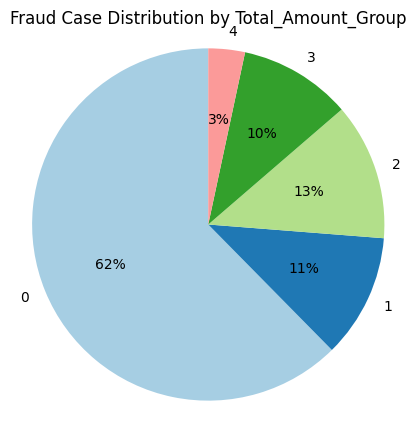

In [31]:
# Count total transactions per Total_Amount_Group
group_counts = df['Total_Amount_Group'].value_counts().sort_index()

# Count fraud transactions per Total_Amount_Group
fraud_group_counts = df[df['Is_Fraud'] == 1]['Total_Amount_Group'].value_counts().sort_index()

# Calculate fraud rate for each group (fraud / total transactions in group)
fraud_rate_per_group = (fraud_group_counts / group_counts) * 100

# Print results
for group in group_counts.index:
    print(f"Group: {group}")
    print(f"  Total transactions: {group_counts[group]}")
    print(f"  Fraud transactions: {fraud_group_counts[group]}")
    print(f"  Fraud rate: {fraud_rate_per_group[group]:.2f}%")
    print()

# Plot pie chart showing distribution of fraud cases by Total_Amount_Group
plt.figure(figsize=(5, 5))
plt.pie(fraud_group_counts, labels=fraud_group_counts.index, autopct='%1.0f%%', startangle=90,
        colors=plt.cm.Paired.colors)
plt.title('Fraud Case Distribution by Total_Amount_Group')
plt.axis('equal')
plt.show()

- Group 0 has the highest fraud rate; however, this is not particularly concerning since the system likely blocked most fraudulent customers before they were able to make any transactions.
- Notably, Group 2 (MID LOW) has the highest fraud risk rate at 13%. Customers with transaction amounts ranging from the 30th to 60th percentile (approximately VND 122 million to 286 million) show the highest likelihood of fraud.
- Additionally, although Group 4 (HIGH) accounts for only 3% of all fraud cases, it poses a significant threat to the banking system due to the greater financial losses it can cause compared to other groups.

***Distribution On Target***

In [32]:
# Split the dataset into two parts: Train and Target
columns = df.columns  # Get all columns from the dataframe
# Target column
target_column = ['Is_Fraud']
# Train columns
train_columns = columns.difference(target_column)  # Remove the target column

In [33]:
target_column

['Is_Fraud']

In [34]:
train_columns

Index(['AGE_Group', 'DT_to_Cre_Acc', 'DT_to_EKYC', 'DT_to_Make_1stTrns',
       'Digital Direct Sale', 'Ecosystem', 'Is_Foreign', 'Is_Male',
       'Partnership', 'RB', 'SCORE_Liveness', 'SCORE_Matching', 'SCORE_Sanity',
       'SCORE_Tampering', 'Telesale', 'Total_Amount_Group', 'Trans_Count'],
      dtype='object')

In [35]:
X = df[train_columns]
y = df[target_column]

# Data size
df.shape[0]

46644

Number of samples per label:
Is_Fraud
0           43127
1            3517
Name: count, dtype: int64


<Axes: ylabel='target_column'>

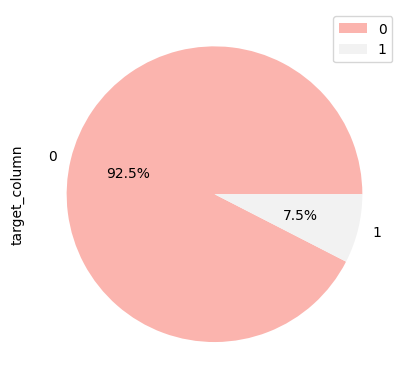

In [36]:
# # Count the number of samples for each label in y
print("Number of samples per label:")
print(y.value_counts())

# Plot the distribution of the target variable
y.groupby(target_column[0]).size().plot(kind='pie',
                                          y = "target_column",
                                          label = "target_column",
                                          autopct='%1.1f%%',
                                          legend=True,
                                          colormap='Pastel1')

- A severe class imbalance is observed in the target column (Is_Fraud), with **92.5% (43,127 samples) labeled as Normal (0)** and only **7.5% (3,517 samples) labeled as Fraud (1)**.
- This imbalance should be addressed to ensure the model does not become biased toward the majority class (Normal) and fail to detect fraudulent cases.
- To handle this, I applied a resampling technique—specifically, SMOTE (Synthetic Minority Over-sampling Technique). Instead of using undersampling (which would reduce the number of majority class samples), I opted for oversampling to synthetically increase the number of minority class (Fraud) samples. This ensures a richer dataset, allowing the model to learn patterns in fraudulent behavior more effectively.

***Outlier Handling***

**Before Handling:**

In [37]:
def boxplt(df,features):
    # Get name of columns
    int_vars = features

    # Create a figure with subplots
    num_cols=len(int_vars)
    num_rows = (num_cols+2)//4

    fig, axs = plt.subplots(nrows=num_rows,ncols=4,figsize=(8,3*num_rows))
    axs=axs.flatten()

    # Create a countplot for each feature
    for i, var in enumerate(int_vars):
        if i< num_cols:
            sns.boxplot(data=df,y=var, ax=axs[i])
            axs[i].set_title(var)

    # Adjust spacing between subplots
    fig.tight_layout()

    # Remove any extra empty subplots if needed
    if num_cols < len (axs):
        for i in range(num_cols,len(axs)):
            fig.delaxes(axs[i])

    # Show plot
    plt.show()

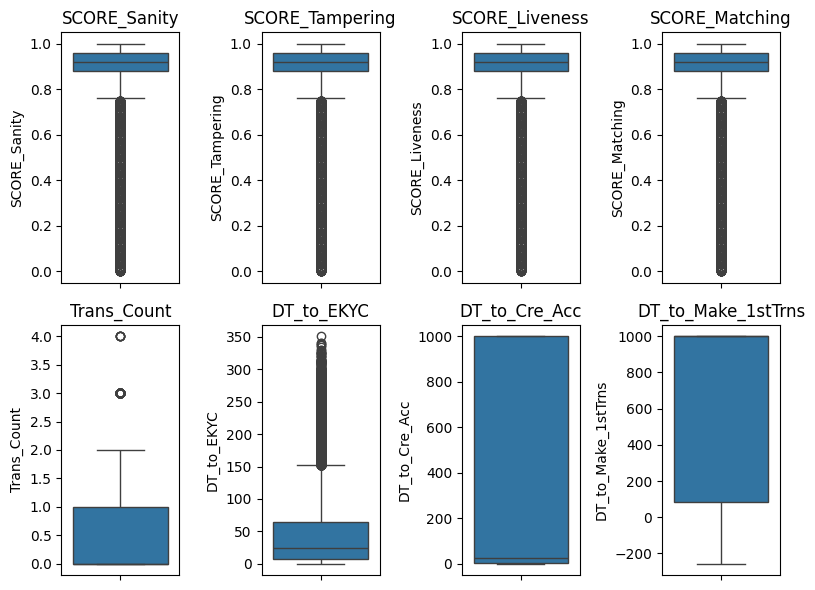

In [38]:
boxplt(X,num_columns)

Here, we can observe that many points considered as outliers appear quite frequently in the SCORE columns. However, I believe these may not actually be outliers, for the following reasons:

- These values fall within the valid range defined by the problem (from 0 to 1), which is a reasonable interval for normalized indicators like SCORE.
- Statistically, outliers are typically rare points that deviate significantly from the main distribution of the data. When suspected outliers appear with high density, we should reconsider labeling them as such. This pattern may reflect a particular distributional characteristic rather than an anomaly.

Therefore, removing these points mechanically may lead to the loss of valuable information.

**After Handling:**

I decided to process only the following four columns:
- Trans_Count
- DT_to_EKYC
- DT_to_Cre_Acc
- DT_to_Make_1stTrns

In [39]:
#Trans_Count range (0-2)
X['Trans_Count'] = X['Trans_Count'].clip(lower=0, upper=2)
#DT_to_EKYC
X['DT_to_EKYC'] = X['DT_to_EKYC'].clip(lower=0, upper=365)
#DT_to_Cre_Acc
X['DT_to_Cre_Acc'] = X['DT_to_Cre_Acc'].clip(lower=0, upper=365)
#DT_to_Make_1stTrns
X['DT_to_Make_1stTrns'] = X['DT_to_Make_1stTrns'].clip(lower=0, upper=365)

/tmp/ipython-input-39-3341491366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Trans_Count'] = X['Trans_Count'].clip(lower=0, upper=2)
/tmp/ipython-input-39-3341491366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DT_to_EKYC'] = X['DT_to_EKYC'].clip(lower=0, upper=365)
/tmp/ipython-input-39-3341491366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

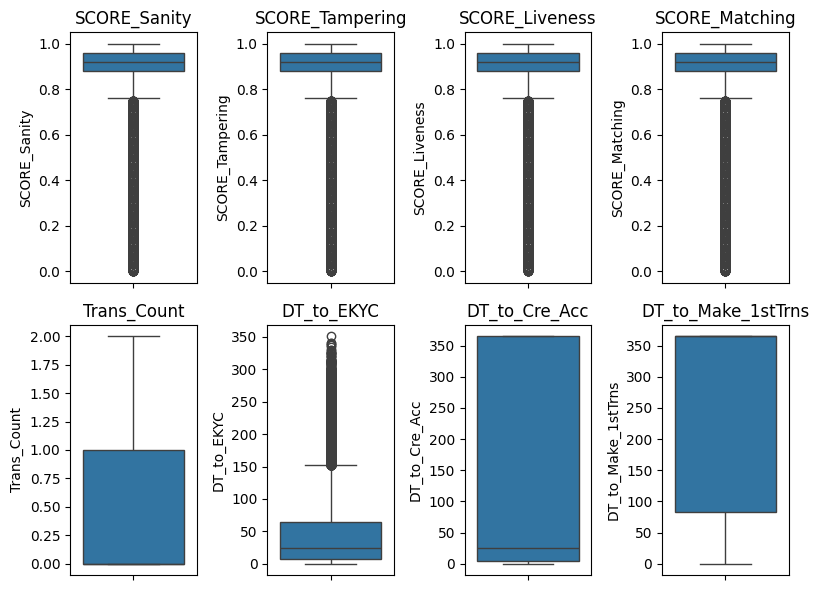

In [40]:
boxplt(X,num_columns)

In [41]:
# Print the new shape of the DataFrame
print("New Shape: ", X.shape)

New Shape:  (46644, 17)


In [42]:
X.shape

(46644, 17)

In [43]:
y.shape

(46644, 1)

In [44]:
new_df = X.copy()  # Get the columns from X
new_df['target'] = y.loc[X.index]  # Create a 'target' column and assign values from y based on the correct index

In [45]:
new_cat_columns = X.columns.difference(num_columns)

In [46]:
print('Numerics:', num_columns)
print('Categorical:', new_cat_columns)

Numerics: ['SCORE_Sanity', 'SCORE_Tampering', 'SCORE_Liveness', 'SCORE_Matching', 'Trans_Count', 'DT_to_EKYC', 'DT_to_Cre_Acc', 'DT_to_Make_1stTrns']
Categorical: Index(['AGE_Group', 'Digital Direct Sale', 'Ecosystem', 'Is_Foreign',
       'Is_Male', 'Partnership', 'RB', 'Telesale', 'Total_Amount_Group'],
      dtype='object')


## **DATA SELECTION**

- To select important features that contribute to predicting the target class, Mutual Information (MI) is a suitable method.

- It identifies which features are most strongly related to the target label by measuring the degree of dependency between each feature and the target variable.

- The higher the MI score, the more informative the feature is for accurate classification.

Mutual Information scores for classification:
                Feature  Mutual Information
1         DT_to_Cre_Acc            0.031947
3    DT_to_Make_1stTrns            0.012529
7               Is_Male            0.008419
16          Trans_Count            0.003392
12         SCORE_Sanity            0.002974
0             AGE_Group            0.002861
9                    RB            0.002617
15   Total_Amount_Group            0.002411
8           Partnership            0.001115
2            DT_to_EKYC            0.000875
11       SCORE_Matching            0.000806
4   Digital Direct Sale            0.000000
6            Is_Foreign            0.000000
5             Ecosystem            0.000000
10       SCORE_Liveness            0.000000
14             Telesale            0.000000
13      SCORE_Tampering            0.000000


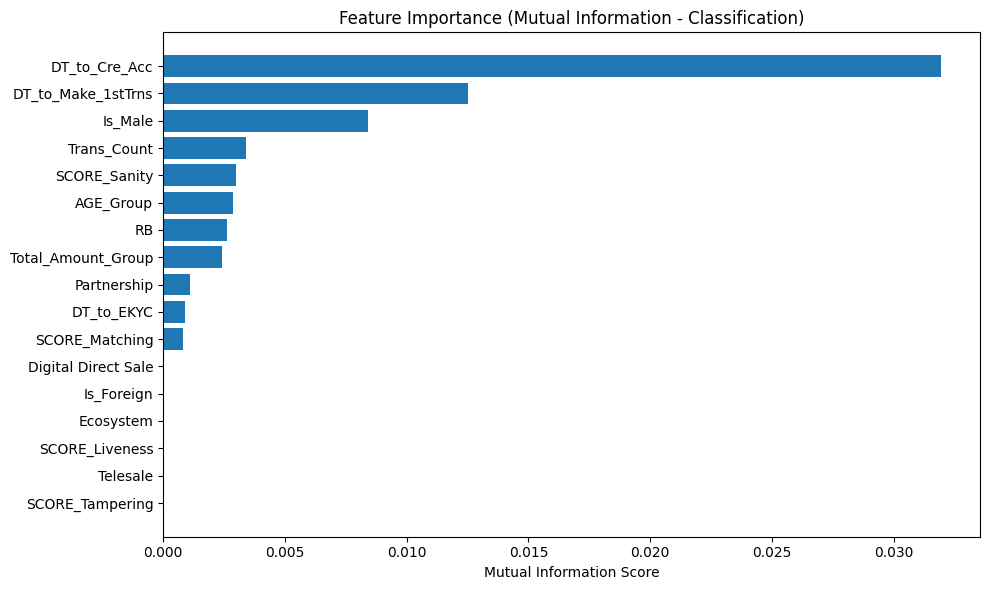

In [47]:
# Suppose new_df contains the entire dataset, where the 'target' column is the classification variable (0 = normal, 1 = fraud)
X = new_df.drop('target', axis=1)  # Features
y = new_df['target']              # Target

# Calculate Mutual Information for classification problem
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame showing MI score for each feature
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
})

# Sort by importance in descending order
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Print results
print("Mutual Information scores for classification:")
print(mi_df)

# Plot the chart
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'])
plt.xlabel("Mutual Information Score")
plt.title("Feature Importance (Mutual Information - Classification)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Values that are close to 0 do not carry much information for model building; therefore, I decided to remove features with scores below 0.0005.

In [48]:
# Filter columns with MI < 0.0005 (the threshold can be adjusted if needed)
low_info_features = mi_df[mi_df['Mutual Information'] < 0.0005]['Feature'].tolist()

print("Columns that do not contribute much information:")
print(low_info_features)

# Drop these columns from new_df
new_df = new_df.drop(columns=low_info_features)

# Check the new shape
print(f"Dataset shape after removal: {new_df.shape}")

Columns that do not contribute much information:
['Digital Direct Sale', 'Is_Foreign', 'Ecosystem', 'SCORE_Liveness', 'Telesale', 'SCORE_Tampering']
Dataset shape after removal: (46644, 12)


## **DATA MODEL**

### ***SPLITTING DATA TRAIN/TEST SET***

In [49]:
new_df

,AGE_Group,DT_to_Cre_Acc,DT_to_EKYC,DT_to_Make_1stTrns,Is_Male,Partnership,RB,SCORE_Matching,SCORE_Sanity,Total_Amount_Group,Trans_Count,target
11334,4,3,12,15,1,0,1,1.00,0.94,4,2,0
11921,1,3,2,365,1,0,0,0.92,0.93,0,0,0
9278,2,365,16,365,1,0,0,0.99,0.94,0,0,0
42396,3,5,64,64,0,1,0,0.89,0.94,3,1,0
6314,1,365,80,365,0,0,0,0.93,0.90,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40705,3,17,169,365,1,0,0,0.95,0.93,0,0,0
421,2,365,102,365,1,0,1,0.97,1.00,0,0,0
32462,1,365,125,365,1,0,1,0.94,0.97,0,0,0
24613,0,365,13,365,1,1,0,0.92,0.98,0,0,0


In [50]:
X = new_df.iloc[:,:10]
y = new_df.iloc[:,-1]

In [51]:
X.head(5)

,AGE_Group,DT_to_Cre_Acc,DT_to_EKYC,DT_to_Make_1stTrns,Is_Male,Partnership,RB,SCORE_Matching,SCORE_Sanity,Total_Amount_Group
11334,4,3,12,15,1,0,1,1.00,0.94,4
11921,1,3,2,365,1,0,0,0.92,0.93,0
9278,2,365,16,365,1,0,0,0.99,0.94,0
42396,3,5,64,64,0,1,0,0.89,0.94,3
6314,1,365,80,365,0,0,0,0.93,0.90,0


In [52]:
y.head(5)

,target
11334,0
11921,0
9278,0
42396,0
6314,0


In [53]:
y.value_counts()

,count
target,
0,43127
1,3517


### ***FEATURE SCALER***

Applying scaling directly on the entire X dataset can lead to several issues, most notably **data leakage**—where the model unintentionally gains access to information from the test set, resulting in biased and non-objective evaluation results.
Therefore, the best practice is to split the data into training and testing sets first, then fit the scaler only on X_train, and use it to transform both X_train and X_test.

In [54]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data (fit the scaler only on X_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # do not use fit_transform

In [55]:
# Save the scaler and the list of feature columns for the purpose of processing data in the hold-out set.
save_path = r'/content/'

# Save the scaler
with open(save_path + 'scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the list of input feature names
feature_columns = X.columns.tolist()
with open(save_path + 'feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)

- Using SMOTE (Synthetic Minority Over-sampling Technique) is a common method to handle imbalanced datasets by generating synthetic samples for the minority class. However, it is crucial to apply SMOTE only on the training set after splitting the data into training and testing sets.

- If applied before splitting, the synthetic samples may cause **data leakage** from the training set into the test set. This leads to biased model evaluation, producing overly optimistic results that do not accurately reflect the model’s performance on real-world data.


In [56]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Convert back to DataFrame (keep original column names)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
# Check the number of samples
print("Before SMOTE:")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"Class distribution: {pd.Series(y_train).value_counts()}")

print("\nAfter SMOTE:")
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"Class distribution: {pd.Series(y_train_resampled).value_counts()}")

Before SMOTE:
X_train shape: (34983, 10)
Class distribution: target
0    32341
1     2642
Name: count, dtype: int64

After SMOTE:
X_train_resampled shape: (64682, 10)
Class distribution: target
0    32341
1    32341
Name: count, dtype: int64


In [57]:
print(X_train_scaled)

[[-0.11747763 -0.80465979 -0.72858491 ...  0.29678502 -0.42585435
   1.31487281]
 [-1.72818503 -0.66230157 -0.78508453 ...  0.71826964  0.62556078
   3.15494783]
 [ 0.68787607 -0.45804847 -0.61558569 ... -0.04040267 -0.102342
  -0.52520222]
 ...
 [-0.92283133 -0.78609133 -0.74741812 ...  0.38108195 -0.02146392
  -0.52520222]
 [-0.11747763 -0.55708028  0.51440655 ...  0.38108195 -0.26409818
  -0.52520222]
 [-0.11747763 -0.76752287 -0.52141967 ...  0.46537887  0.14029226
   2.23491032]]


In [58]:
X_train_scaled.shape

(34983, 10)

In [59]:
print(X_test_scaled)

       AGE_Group  DT_to_Cre_Acc  DT_to_EKYC  DT_to_Make_1stTrns   Is_Male  \
0       1.493230      -0.581838   -0.314254            0.588671  0.992907   
1       0.687876      -0.235227    3.151055            0.588671  0.992907   
2       0.687876      -0.761333   -0.370754            0.588671 -1.007143   
3      -0.117478       1.448314   -0.351921            0.588671 -1.007143   
4      -0.922831       1.448314   -0.728585            0.588671 -1.007143   
...          ...            ...         ...                 ...       ...   
11656   0.687876      -0.563270   -0.653252            0.588671  0.992907   
11657   0.687876       1.448314    0.796905            0.588671 -1.007143   
11658  -0.117478      -0.736575   -0.709752           -1.696250 -1.007143   
11659  -0.117478      -0.600407   -0.615586            0.588671  0.992907   
11660  -0.117478      -0.761333   -0.446087            0.588671 -1.007143   

       Partnership        RB  SCORE_Matching  SCORE_Sanity  Total_Amount_Gr

## **IMPLEMENT MODEL**

### ***Model Comparision***

**Logistic Regression:**

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

LGR - Best Params: {'C': 0.01, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
LGR - Best Score: 0.6465233245916877

LGR - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.43      0.59     10786
           1       0.11      0.89      0.20       875

    accuracy                           0.46     11661
   macro avg       0.55      0.66      0.40     11661
weighted avg       0.92      0.46      0.56     11661



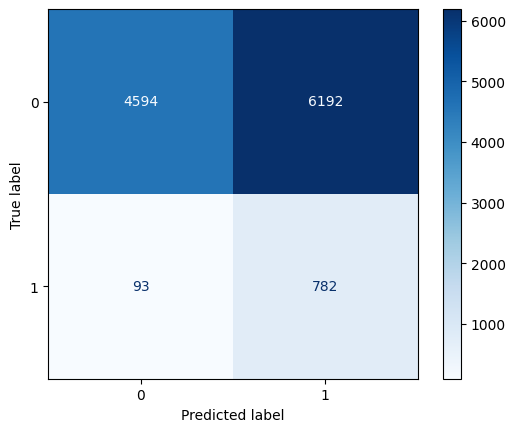

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Configure GridSearch for Logistic Regression
param_grid_lgr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga'],  # saga supports elasticnet and l1
    'max_iter': [500]
}

# Initialize model and GridSearchCV
lr_model = LogisticRegression(random_state=42)
grid_lgr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lgr, scoring='f1_macro', cv=5, n_jobs=-1)
grid_lgr.fit(X_train_resampled, y_train_resampled)

# Print GridSearch results
print("LGR - Best Params:", grid_lgr.best_params_)
print("LGR - Best Score:", grid_lgr.best_score_)

# Predict and evaluate on test set
y_pred_lgr = grid_lgr.predict(X_test_scaled)

# Confusion matrix
cm_lgr = confusion_matrix(y_test, y_pred_lgr)
disp_lgr = ConfusionMatrixDisplay(confusion_matrix=cm_lgr)
disp_lgr.plot(cmap='Blues')

# Classification report
print("\nLGR - Classification Report:\n", classification_report(y_test, y_pred_lgr))

**DecisionTree:**

Best Params (Decision Tree): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score (Decision Tree): 0.9204396559311514

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     10786
           1       0.12      0.08      0.10       875

    accuracy                           0.88     11661
   macro avg       0.52      0.52      0.52     11661
weighted avg       0.87      0.88      0.87     11661



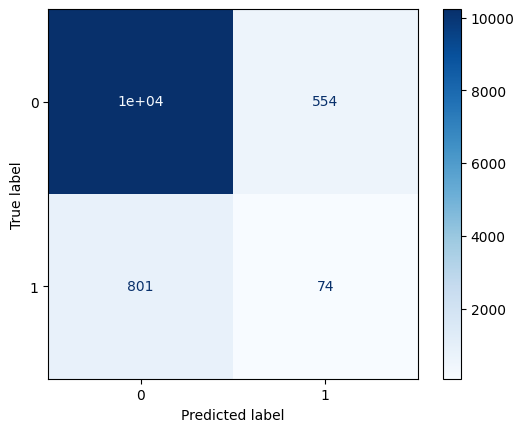

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Configure GridSearch for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model and GridSearchCV
dt_model = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

# Training
dt_grid_search.fit(X_train_resampled, y_train_resampled)

# Best results
print("Best Params (Decision Tree):", dt_grid_search.best_params_)
print("Best Score (Decision Tree):", dt_grid_search.best_score_)

# Predict on test set
dt_y_pred = dt_grid_search.predict(X_test_scaled)

# Confusion matrix
dt_cm = confusion_matrix(y_test, dt_y_pred)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm)
dt_disp.plot(cmap='Blues')

# Classification report
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, dt_y_pred))

**K-nearest neighbors:**

Best Params (KNN): {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Score (KNN): 0.8818729122174818

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.94      0.81      0.87     10786
           1       0.12      0.31      0.17       875

    accuracy                           0.77     11661
   macro avg       0.53      0.56      0.52     11661
weighted avg       0.87      0.77      0.82     11661



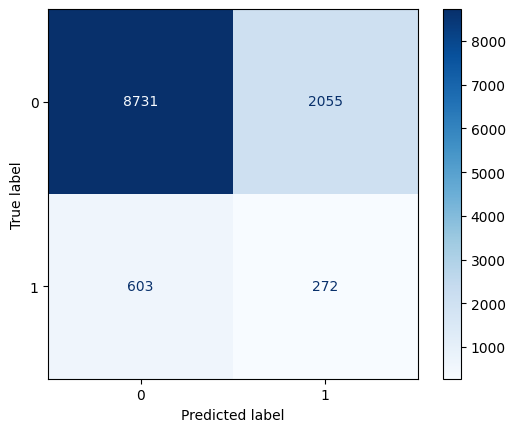

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Configure GridSearch for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the model and GridSearchCV
knn_model = KNeighborsClassifier()
knn_grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

# Train the model
knn_grid_search.fit(X_train_resampled, y_train_resampled)

# Best results
print("Best Params (KNN):", knn_grid_search.best_params_)
print("Best Score (KNN):", knn_grid_search.best_score_)

# Predict on the test set
knn_y_pred = knn_grid_search.predict(X_test_scaled)

# Confusion matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
knn_disp.plot(cmap='Blues')

# Classification report
print("\nClassification Report (KNN):\n", classification_report(y_test, knn_y_pred))

**Linear Discriminant Analysis:**

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 700, in fit
    raise NotImplementedError(

Best Params (LDA): {'shrinkage': None, 'solver': 'svd'}
Best Score (LDA): 0.6447119963312765

Classification Report (LDA):
               precision    recall  f1-score   support

           0       0.99      0.39      0.56     10786
           1       0.11      0.94      0.20       875

    accuracy                           0.43     11661
   macro avg       0.55      0.67      0.38     11661
weighted avg       0.92      0.43      0.53     11661



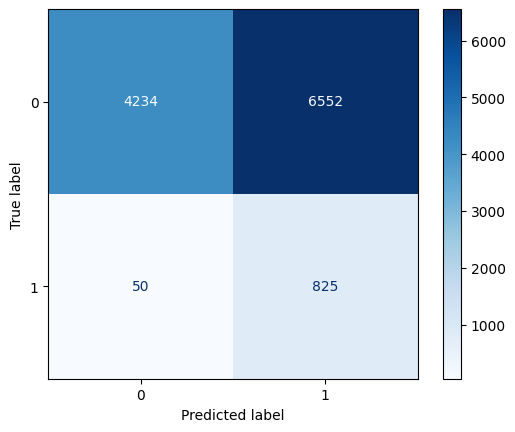

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Configure GridSearch for LDA
lda_param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto']  # only used with 'lsqr' and 'eigen'
}

# Initialize the model and GridSearchCV
lda_model = LinearDiscriminantAnalysis()
lda_grid_search = GridSearchCV(
    estimator=lda_model,
    param_grid=lda_param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

# Train the model
lda_grid_search.fit(X_train_resampled, y_train_resampled)

# Best results
print("Best Params (LDA):", lda_grid_search.best_params_)
print("Best Score (LDA):", lda_grid_search.best_score_)

# Predict on the test set
lda_y_pred = lda_grid_search.predict(X_test_scaled)

# Confusion matrix
lda_cm = confusion_matrix(y_test, lda_y_pred)
lda_disp = ConfusionMatrixDisplay(confusion_matrix=lda_cm)
lda_disp.plot(cmap='Blues')

# Classification report
print("\nClassification Report (LDA):\n", classification_report(y_test, lda_y_pred))

**Native Bayes:**

Best Params (NB): {'var_smoothing': 1e-09}
Best Score (NB): 0.6485668146907761

Classification Report (NB):
               precision    recall  f1-score   support

           0       0.98      0.41      0.58     10786
           1       0.11      0.91      0.20       875

    accuracy                           0.45     11661
   macro avg       0.55      0.66      0.39     11661
weighted avg       0.92      0.45      0.55     11661



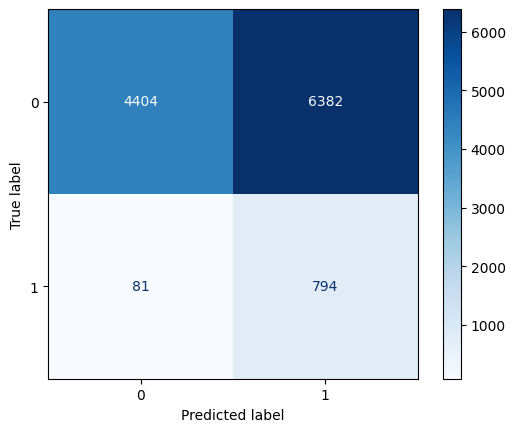

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# GridSearchCV parameters for Naive Bayes
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Initialize the model and GridSearch
nb_model = GaussianNB()
nb_grid_search = GridSearchCV(
    estimator=nb_model,
    param_grid=nb_param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

# Train the model
nb_grid_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters and score
print("Best Params (NB):", nb_grid_search.best_params_)
print("Best Score (NB):", nb_grid_search.best_score_)

# Predict
nb_y_pred = nb_grid_search.predict(X_test_scaled)

# Confusion matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm)
nb_disp.plot(cmap='Blues')

# Classification report
print("\nClassification Report (NB):\n", classification_report(y_test, nb_y_pred))

**Random Forest:**

Best Params (RFC): {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (RFC): 0.9541845905135549

Classification Report (RFC):
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     10786
           1       0.12      0.03      0.05       875

    accuracy                           0.91     11661
   macro avg       0.52      0.51      0.50     11661
weighted avg       0.87      0.91      0.88     11661



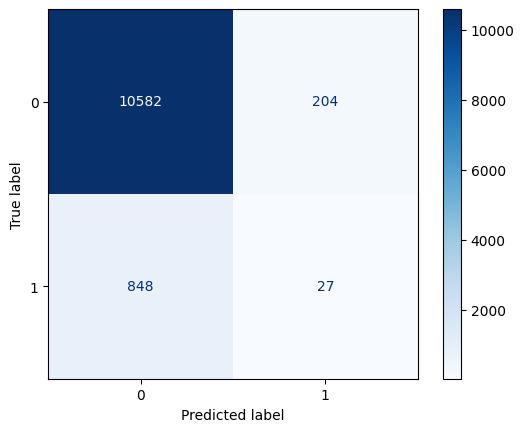

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Parameters for GridSearch
rfc_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

# Initialize model and GridSearchCV
rfc_model = RandomForestClassifier(random_state=42)
rfc_grid_search = GridSearchCV(
    estimator=rfc_model,
    param_grid=rfc_param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

# Train the model
rfc_grid_search.fit(X_train_resampled, y_train_resampled)

# Best results
print("Best Params (RFC):", rfc_grid_search.best_params_)
print("Best Score (RFC):", rfc_grid_search.best_score_)

# Predict
rfc_y_pred = rfc_grid_search.predict(X_test_scaled)

# Confusion matrix
rfc_cm = confusion_matrix(y_test, rfc_y_pred)
rfc_disp = ConfusionMatrixDisplay(confusion_matrix=rfc_cm)
rfc_disp.plot(cmap='Blues')

# Classification report
print("\nClassification Report (RFC):\n", classification_report(y_test, rfc_y_pred))

### ***Visualize AUC-ROC Curve***

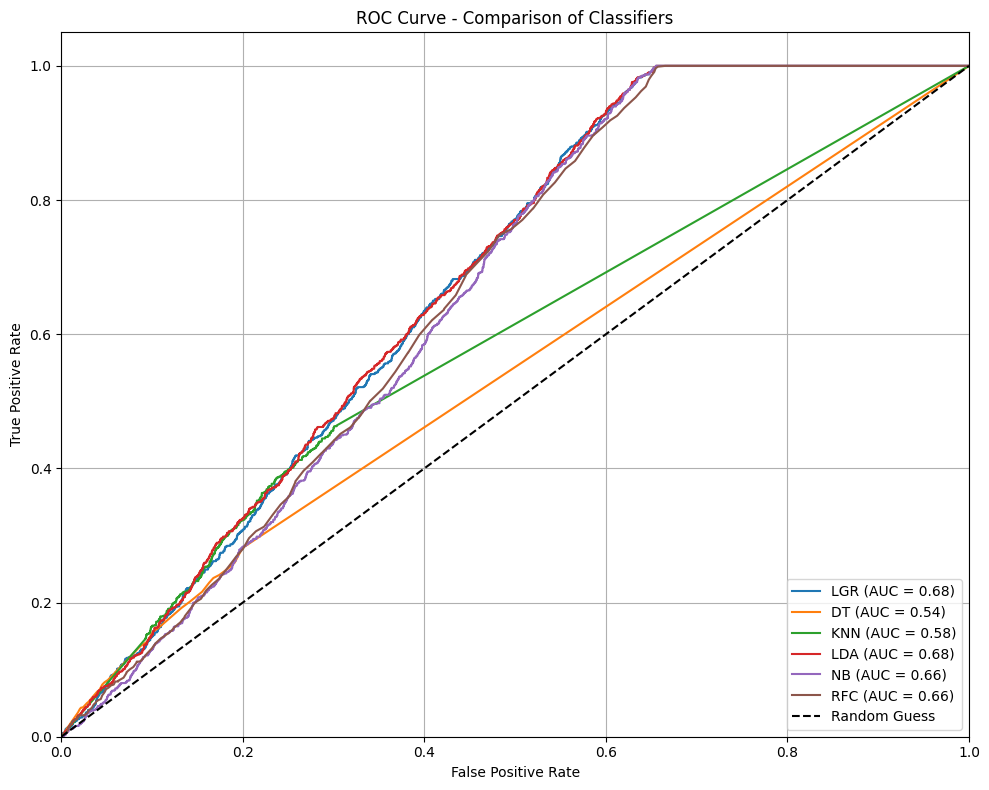

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get the predicted probabilities for the positive class (class 1)
y_score_lgr = grid_lgr.predict_proba(X_test_scaled)[:, 1]
y_score_dt = dt_grid_search.predict_proba(X_test_scaled)[:, 1]
y_score_knn = knn_grid_search.predict_proba(X_test_scaled)[:, 1]
y_score_lda = lda_grid_search.predict_proba(X_test_scaled)[:, 1]
y_score_nb = nb_grid_search.predict_proba(X_test_scaled)[:, 1]
y_score_rfc = rfc_grid_search.predict_proba(X_test_scaled)[:, 1]

# Calculate FPR, TPR, and AUC for each model
fpr_lgr, tpr_lgr, _ = roc_curve(y_test, y_score_lgr)
roc_auc_lgr = auc(fpr_lgr, tpr_lgr)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_lda, tpr_lda, _ = roc_curve(y_test, y_score_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_score_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lgr, tpr_lgr, label=f"LGR (AUC = {roc_auc_lgr:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"DT (AUC = {roc_auc_dt:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {roc_auc_lda:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"NB (AUC = {roc_auc_nb:.2f})")
plt.plot(fpr_rfc, tpr_rfc, label=f"RFC (AUC = {roc_auc_rfc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Comparison of Classifiers")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

- We can observe that the AUC scores of the models are quite low, all below 0.7 and in some cases even close to 0.5. This occurs because the models generate too many False Positives (FP), which increases the False Positive Rate (FPR) and consequently lowers the AUC.

- This indicates that the models are struggling to correctly distinguish between the two classes, especially showing a tendency to confuse the negative class with the positive one. An AUC close to 0.5 suggests that the model is making predictions almost randomly, without effectively capturing the distinctive patterns in the data.
- **Three models—LGR, LDA, and NB—are suitable for this problem**. Although these models have a high number of false positives (FP), they maintain a very low number of false negatives (FN) compared to the others. Since the goal of this problem is to prevent fraudsters as much as possible in order to minimize losses for the bank, these models align well with that objective.

## **THRESHOLD JUSTIFICATION**

### ***Visualize predicted probility***

/tmp/ipython-input-67-360641107.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fail_probs, success_probs], labels=['NORMAL (0)', 'FRAUD (1)'])


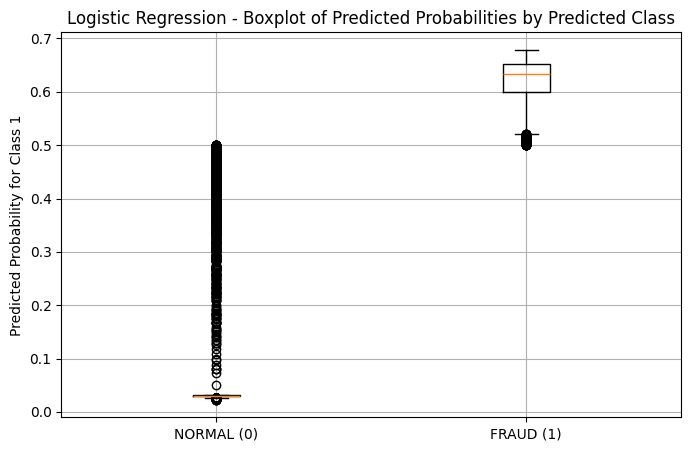


Logistic Regression - Descriptive Stats for FRAUD (1):
count    6974.000000
mean        0.621597
std         0.040801
min         0.500068
25%         0.599369
50%         0.633176
75%         0.652136
max         0.678857
Name: prob, dtype: float64

Logistic Regression - Descriptive Stats for NORMAL (0):
count    4687.000000
mean        0.105467
std         0.154127
min         0.022768
25%         0.029288
50%         0.030460
75%         0.031103
max         0.499962
Name: prob, dtype: float64




/tmp/ipython-input-67-360641107.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fail_probs, success_probs], labels=['NORMAL (0)', 'FRAUD (1)'])


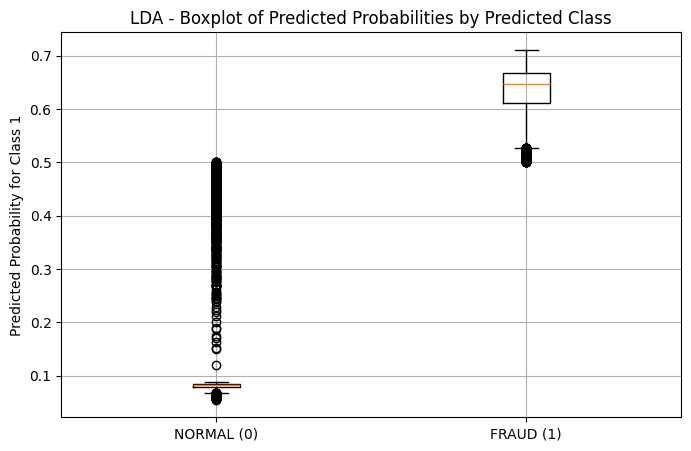


LDA - Descriptive Stats for FRAUD (1):
count    7377.000000
mean        0.634639
std         0.043699
min         0.500036
25%         0.611294
50%         0.646090
75%         0.666959
max         0.711062
Name: prob, dtype: float64

LDA - Descriptive Stats for NORMAL (0):
count    4284.000000
mean        0.124915
std         0.117826
min         0.054861
25%         0.078108
50%         0.082612
75%         0.085288
max         0.499994
Name: prob, dtype: float64




/tmp/ipython-input-67-360641107.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fail_probs, success_probs], labels=['NORMAL (0)', 'FRAUD (1)'])


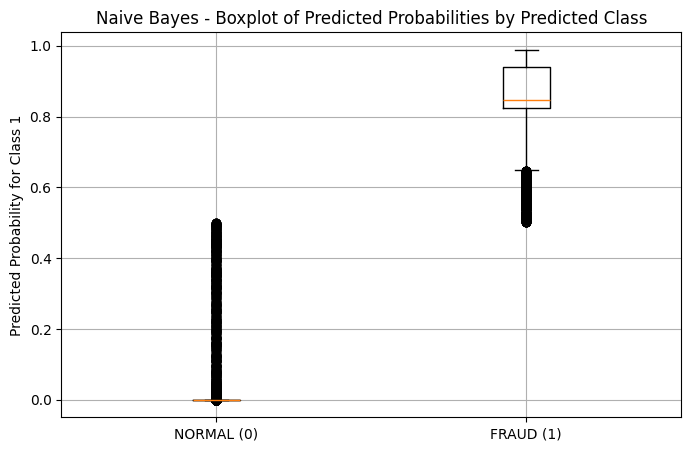


Naive Bayes - Descriptive Stats for FRAUD (1):
count    7176.000000
mean        0.855602
std         0.094445
min         0.501799
25%         0.823517
50%         0.846859
75%         0.939833
max         0.989110
Name: prob, dtype: float64

Naive Bayes - Descriptive Stats for NORMAL (0):
count    4.485000e+03
mean     3.022507e-02
std      9.760616e-02
min      3.814078e-37
25%      3.146636e-35
50%      3.729239e-35
75%      3.856641e-35
max      4.999395e-01
Name: prob, dtype: float64




In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# List of models and names for easy plotting
models = [
    ('Logistic Regression', grid_lgr),
    ('LDA', lda_grid_search),
    ('Naive Bayes', nb_grid_search)
]

# Create boxplot for each model
for name, model in models:
    if hasattr(model, "predict_proba"):
        # Copy X_test_scaled to add information
        test_df = pd.DataFrame(X_test_scaled, columns=[f'feature_{i}' for i in range(X_test_scaled.shape[1])]).copy()

        # Predicted probability for class 1 (fraud)
        test_df['prob'] = model.predict_proba(X_test_scaled)[:, 1]

        # Predicted labels (output class)
        test_df['output'] = model.predict(X_test_scaled)

        # Group by output
        fail_probs = test_df.loc[test_df['output'] == 0, 'prob']
        success_probs = test_df.loc[test_df['output'] == 1, 'prob']

        # Boxplot
        plt.figure(figsize=(8, 5))
        plt.boxplot([fail_probs, success_probs], labels=['NORMAL (0)', 'FRAUD (1)'])
        plt.title(f'{name} - Boxplot of Predicted Probabilities by Predicted Class')
        plt.ylabel('Predicted Probability for Class 1')
        plt.grid(True)
        plt.show()

        # Print descriptive statistics
        print(f"\n{name} - Descriptive Stats for FRAUD (1):")
        print(success_probs.describe())

        print(f"\n{name} - Descriptive Stats for NORMAL (0):")
        print(fail_probs.describe())
        print("\n" + "="*60 + "\n")

Considering the prediction on class 1 (the 'FRAUD' class):

- In the NORMAL (0) group — meaning transactions that the model predicted as normal - the predicted probabilities are very low (around 0.02), indicating that the model is quite confident when classifying as NORMAL. However, there still exist some outliers approaching 0.5, suggesting that the model is not entirely certain that those transactions are normal - it hesitates and suspects they might be fraud. Yet, we cannot conclude these are false negatives (FN) because the model only outputs predicted labels, not the actual ground truth.

- Similarly, in the FRAUD (1) group - transactions predicted as fraudulent - the predicted probabilities are relatively high (mostly above 0.6). However, some points lie close to the 0.5 threshold, meaning the model is only slightly leaning toward fraud, indicating uncertainty.

- Overall, the classification between the two groups works fairly well, as the model clearly separates NORMAL and FRAUD through predicted probabilities. However, a few uncertain points remain, located near the decision threshold.

- However, after examining the results of the three selected models, we can observe:

  + A high number of true positives (TP) indicates that the model performs well in detecting fraud in the FRAUD (1) group. However, the presence of false positives (FP) can explain why the boxplot for FRAUD contains some transactions that are actually NORMAL but had probabilities slightly above 0.5, thus causing FP.
  + In the NORMAL (0) group, some points near the 0.5 threshold (the outliers) could possibly be false negatives (FN).

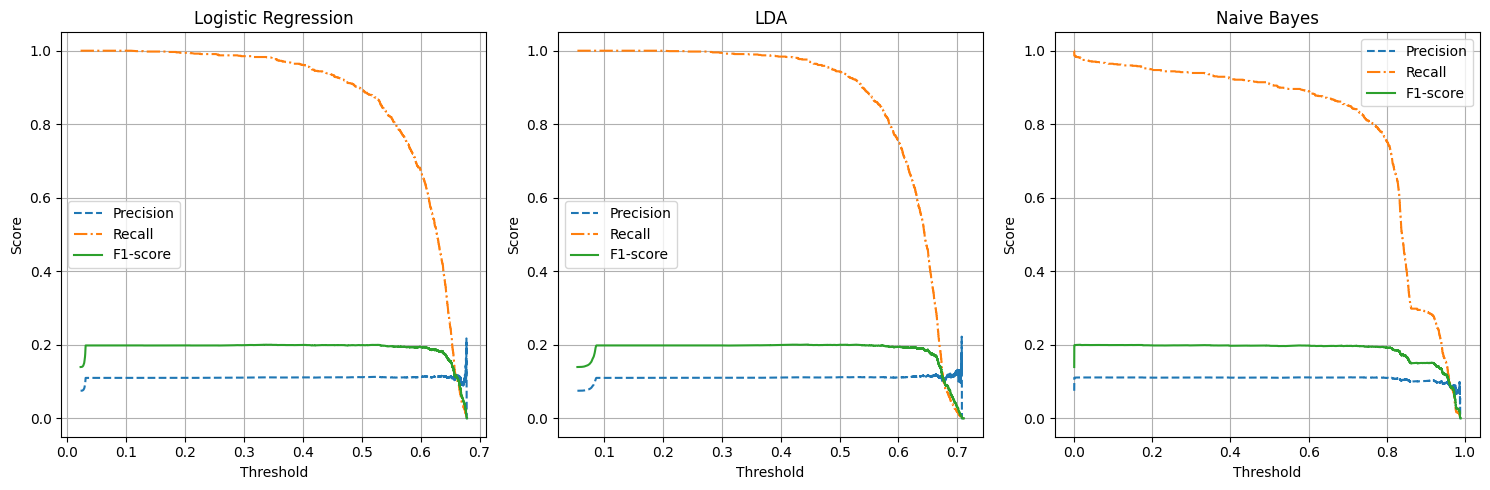

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

plt.figure(figsize=(15, 5))

for i, (model_name, model) in enumerate(models):
    # Use predict_proba to get the probability of class 1
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        continue  # skip if model does not support predict_proba

    # Calculate precision and recall for various thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

    # Calculate F1 score for each threshold
    f1 = 2 * (precision * recall) / (precision + recall + 1e-6)

    # Plot the curves
    plt.subplot(1, 3, i+1)
    plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
    plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-.')
    plt.plot(thresholds, f1[:-1], label='F1-score', linestyle='-')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(model_name)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

- As we can see, all three models share a common characteristic: at threshold values around 0.1 - 0.2, Precision is low but stable at around 0.1, whereas Recall is very high, almost reaching 1, and F1-score remains stable at low thresholds but drops significantly as the threshold increases.

- A threshold of 0.5 is not the optimal point, as it does not provide a good balance between Precision and Recall. I need a specific threshold where the F1-score reaches its peak. Therefore, I adjust the threshold based on the maximum F1-score value.

### ***Optimize Threshold***

In [69]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score
import numpy as np

for name, model in models:
    if hasattr(model, "predict_proba"):
        print(f"\n{name} - Tìm Threshold tối ưu theo F1-score")

        probs = model.predict_proba(X_test_scaled)[:, 1]
        precision, recall, thresholds = precision_recall_curve(y_test, probs)

        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        best_index = np.argmax(f1_scores)
        best_threshold = thresholds[best_index]
        best_f1 = f1_scores[best_index]

        print(f"Best Threshold (F1-score): {best_threshold:.2f}")
        print(f"Best F1-score: {best_f1:.3f}")

        y_pred_threshold = (probs >= best_threshold).astype(int)

        print(f"Accuracy: {accuracy_score(y_test, y_pred_threshold):.2f}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold))
        print("Classification Report:")
        print(classification_report(y_test, y_pred_threshold))
        print("="*60)


Logistic Regression - Tìm Threshold tối ưu theo F1-score
Best Threshold (F1-score): 0.35
Best F1-score: 0.200
Accuracy: 0.41
Confusion Matrix:
 [[3946 6840]
 [  16  859]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54     10786
           1       0.11      0.98      0.20       875

    accuracy                           0.41     11661
   macro avg       0.55      0.67      0.37     11661
weighted avg       0.93      0.41      0.51     11661


LDA - Tìm Threshold tối ưu theo F1-score
Best Threshold (F1-score): 0.45
Best F1-score: 0.201
Accuracy: 0.42
Confusion Matrix:
 [[4003 6783]
 [  21  854]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.37      0.54     10786
           1       0.11      0.98      0.20       875

    accuracy                           0.42     11661
   macro avg       0.55      0.67      0.37     11661
weighted avg       0.93    

In this case, I have two choices:

- First, I can lower the threshold (use the optimal threshold), allowing the model to catch more fraud cases and reduce the risk of missing fraudulent transactions. However, the downside of this approach is a significant increase in false positives, which may lead to extra costs for helping legitimate customers recover their accounts. In return, it minimizes the potential losses caused by fraudsters.

- Second, I can keep the default threshold at 0.5 or even raise it to 0.6 - 0.7 to reduce false positives. This helps retain legitimate customers in the NORMAL group, but it comes with a higher risk of undetected fraud, which may result in serious financial losses.

- However, as noted in earlier analyses, fraudsters tend to make transactions involving the highest possible amounts, which becomes even more dangerous if we fail to stop them in time.

- Therefore, we must consider the trade-off between the opportunity cost of mistakenly blocking normal customers and the losses caused by undetected fraud:

  + If the cost of fraud is higher than the cost of helping NORMAL customers recover access, then using a lower threshold would be more optimal.

  + Conversely, if we can quantify the risk of fraud and enhance the fraud detection system, then raising the threshold might help reduce false positives effectively.

- **Thus, my top priority is to prevent as much fraud as possible, so Option 1 is more suitable for my problem.**

## **SAVING MODELS**

In [70]:
import pickle
import os
import numpy as np
from sklearn.metrics import precision_recall_curve

# Assume 3 trained models:
model_dict = {
    'Logistic Regression': grid_lgr,
    'LDA': lda_grid_search,
    'Naive Bayes': nb_grid_search
}

# Create a dictionary for the best thresholds
threshold_dict = {}

# Compute the optimal threshold based on F1 score
for name, model in model_dict.items():
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test_scaled)[:, 1]
        precision, recall, thresholds = precision_recall_curve(y_test, probs)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        best_index = np.argmax(f1_scores)
        best_threshold = thresholds[best_index]
        threshold_dict[name] = best_threshold

# Directory to save models
save_dir = '/content/fraud_models/'
os.makedirs(save_dir, exist_ok=True)

# Save each model separately
for name, model in model_dict.items():
    filename = os.path.join(save_dir, name.lower().replace(" ", "_") + '_model.pkl')
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

# Save threshold_dict
with open(os.path.join(save_dir, 'thresholds_dict.pkl'), 'wb') as f:
    pickle.dump(threshold_dict, f)

print("All models and thresholds have been saved to the directory /content/fraud_models/")

All models and thresholds have been saved to the directory /content/fraud_models/


## **PREPARE FOR REAL TEST**

### ***IMPORT HOLD-OUT SET***

In [71]:
holdout_set

,CRM_Channel,Is_Diff_Dob,Is_Diff_Gender,Is_Diff_Nationality,AGE_Group,OCR_Gender,Nationality,SCORE_Sanity,SCORE_Tampering,SCORE_Liveness,SCORE_Matching,Trans_Count,Total_Amount_Group,DT_to_EKYC,DT_to_Cre_Acc,DT_to_Make_1stTrns,LABEL
8289,Ecosystem,NO,NO,NO,30-33,F,VIETNAMESE,0.92,0.87,0.86,0.88,0,NO TRANS,0,4,1000,NORMAL
37801,RB,NO,NO,NO,22-25,F,VIETNAMESE,0.97,0.85,0.96,0.97,0,NO TRANS,7,1000,1000,NORMAL
36663,RB,NO,NO,NO,26-29,M,VIETNAMESE,0.97,0.93,0.96,0.92,0,NO TRANS,1,1000,1000,NORMAL
30850,Digital Direct Sale,NO,NO,NO,26-29,M,VIETNAMESE,0.92,0.98,0.88,0.89,0,NO TRANS,53,1000,1000,NORMAL
4190,Partnership,NO,NO,NO,30-33,M,VIETNAMESE,0.93,0.91,0.94,0.93,1,MEDIUM HIGH,12,9,13,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,RB,NO,NO,NO,30-33,M,VIETNAMESE,0.89,0.13,0.08,0.68,0,NO TRANS,2,2,1000,NORMAL
6332,Digital Direct Sale,NO,NO,NO,21-,F,VIETNAMESE,0.86,0.95,0.99,0.95,1,LOW,39,52,2,NORMAL
1208,Ecosystem,NO,NO,NO,26-29,F,VIETNAMESE,0.89,0.87,0.93,0.94,0,NO TRANS,38,4,1000,NORMAL
20732,RB,NO,NO,NO,22-25,F,VIETNAMESE,0.93,0.88,0.95,0.85,0,NO TRANS,5,8,1000,NORMAL


### ***PREPOCESS HOLD-OUT DATA***

In [72]:
import pandas as pd
import pickle

def preprocess_holdout(holdout_set):
    # === Load scaler and feature column list ===
    path = r'/content/'  # Updated path
    with open(path + 'scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)

    with open(path + 'feature_columns.pkl', 'rb') as f:
        feature_columns = pickle.load(f)

    # === Drop ID ===
    if 'Customer_ID' in holdout_set.columns:
        holdout_set = holdout_set.drop('Customer_ID', axis=1)

    # === Binary mapping ===
    replace_dict = {
        'Nationality': {'OTHER': 1, 'VIETNAMESE': 0},
        'LABEL': {'FRAUD': 1, 'NORMAL': 0},
        'OCR_Gender': {'M': 1, 'F': 0}
    }
    for col in replace_dict:
        if col in holdout_set.columns:
            holdout_set[col] = holdout_set[col].replace(replace_dict[col])

    # === Rename binary columns ===
    holdout_set = holdout_set.rename(columns={
        'Nationality': 'Is_Foreign',
        'LABEL': 'Is_Fraud',
        'OCR_Gender': 'Is_Male'
    })

    # === Ordinal encoding ===
    if 'Total_Amount_Group' in holdout_set.columns:
        total_amount_categories = ['NO TRANS', 'LOW', 'MEDIUM LOW', 'MEDIUM HIGH', 'HIGH']
        holdout_set['Total_Amount_Group'] = pd.Categorical(
            holdout_set['Total_Amount_Group'], categories=total_amount_categories, ordered=True
        ).codes

    if 'AGE_Group' in holdout_set.columns:
        age_group_categories = ['21-', '22-25', '26-29', '30-33', '34+']
        holdout_set['AGE_Group'] = pd.Categorical(
            holdout_set['AGE_Group'], categories=age_group_categories, ordered=True
        ).codes

    # === One-hot encoding for CRM_Channel ===
    if 'CRM_Channel' in holdout_set.columns:
        df_encoded = pd.get_dummies(holdout_set['CRM_Channel']).astype(int)
        holdout_set = pd.concat([holdout_set.drop('CRM_Channel', axis=1), df_encoded], axis=1)

    # === Clip outlier values ===
    clip_dict = {
        'Trans_Count': (0, 2),
        'DT_to_EKYC': (0, 365),
        'DT_to_Cre_Acc': (0, 365),
        'DT_to_Make_1stTrns': (0, 365)
    }

    for col, (low, high) in clip_dict.items():
        if col in holdout_set.columns:
            holdout_set[col] = holdout_set[col].clip(lower=low, upper=high)

    # === Add missing columns if any ===
    missing_cols = [col for col in feature_columns if col not in holdout_set.columns]
    for col in missing_cols:
        holdout_set[col] = 0

    # === Reorder columns to correct order ===
    holdout_set = holdout_set[feature_columns]

    # === Scale the data ===
    holdout_scaled = scaler.transform(holdout_set)
    holdout_scaled = pd.DataFrame(holdout_scaled, columns=feature_columns)

    return holdout_scaled

### ***APPLY IN HOLD-OUT DATA***

In [88]:
# Filter 10 FRAUD samples
fraud_samples = holdout_set[holdout_set['LABEL'] == 'FRAUD'].sample(n=1, random_state=69)

# Filter 10 NORMAL samples
normal_samples = holdout_set[holdout_set['LABEL'] == 'NORMAL'].sample(n=1, random_state=69)

# Combine into a small test set
test_infer = pd.concat([fraud_samples, normal_samples], ignore_index=True)

X_holdout_processed = preprocess_holdout(test_infer)

# Print info:
print("===== Dataset Dimensions (holdout_set.shape) =====")
print(f"Number of rows: {X_holdout_processed.shape[0]}")
print(f"Number of columns: {X_holdout_processed.shape[1]}")
X_holdout_processed

===== Dataset Dimensions (holdout_set.shape) =====
Number of rows: 2
Number of columns: 10


/tmp/ipython-input-72-3791372996.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  holdout_set[col] = holdout_set[col].replace(replace_dict[col])


,AGE_Group,DT_to_Cre_Acc,DT_to_EKYC,DT_to_Make_1stTrns,Is_Male,Partnership,RB,SCORE_Matching,SCORE_Sanity,Total_Amount_Group
0,-0.922831,-0.458048,-0.766251,0.588671,0.992907,-0.498409,-0.503455,-0.124700,-0.18322,-0.525202
1,-0.922831,1.448314,-0.050590,0.588671,0.992907,-0.498409,-0.503455,0.633973,0.22117,-0.525202


In [89]:
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix, classification_report
import os

# Path to saved models
base_path = '/content/fraud_models/'

model_paths = {
    'Logistic Regression': os.path.join(base_path, 'logistic_regression_model.pkl'),
    'LDA': os.path.join(base_path, 'lda_model.pkl'),
    'Naive Bayes': os.path.join(base_path, 'naive_bayes_model.pkl')
}

# Load thresholds
with open(os.path.join(base_path, 'thresholds_dict.pkl'), 'rb') as f:
    all_thresholds = pickle.load(f)

# Predict using each model
for model_name, path in model_paths.items():
    with open(path, 'rb') as f:
        model = pickle.load(f)

    y_proba = model.predict_proba(X_holdout_processed)[:, 1]
    threshold = all_thresholds[model_name]
    y_pred = (y_proba >= threshold).astype(int)

    print(f"\n====== RESULTS FOR MODEL: {model_name} ======")

    # Add prediction results to test_infer
    test_infer_copy = test_infer.copy()
    test_infer_copy['Prediction'] = y_pred

    # Print each data row and its prediction
    for idx, row in test_infer_copy.iterrows():
        print(f"\n--- Row {idx+1} ---")
        print(row.drop('Prediction').to_dict())  # Print original data
        print(f"Predicted result (Is_Fraud): {row['Prediction']}")
        print("----------------------------")

    print("=" * 60)


====== RESULTS FOR MODEL: Logistic Regression ======

--- Row 1 ---
{'CRM_Channel': 'Digital Direct Sale', 'Is_Diff_Dob': 'NO', 'Is_Diff_Gender': 'NO', 'Is_Diff_Nationality': 'NO', 'AGE_Group': '22-25', 'OCR_Gender': 1, 'Nationality': 0, 'SCORE_Sanity': 0.88, 'SCORE_Tampering': 0.87, 'SCORE_Liveness': 0.86, 'SCORE_Matching': 0.89, 'Trans_Count': 0, 'Total_Amount_Group': 'NO TRANS', 'DT_to_EKYC': 5, 'DT_to_Cre_Acc': 57, 'DT_to_Make_1stTrns': 1000, 'LABEL': 1}
Predicted result (Is_Fraud): 1
----------------------------

--- Row 2 ---
{'CRM_Channel': 'Ecosystem', 'Is_Diff_Dob': 'NO', 'Is_Diff_Gender': 'NO', 'Is_Diff_Nationality': 'NO', 'AGE_Group': '22-25', 'OCR_Gender': 1, 'Nationality': 0, 'SCORE_Sanity': 0.93, 'SCORE_Tampering': 0.98, 'SCORE_Liveness': 0.98, 'SCORE_Matching': 0.98, 'Trans_Count': 0, 'Total_Amount_Group': 'NO TRANS', 'DT_to_EKYC': 43, 'DT_to_Cre_Acc': 1000, 'DT_to_Make_1stTrns': 1000, 'LABEL': 0}
Predicted result (Is_Fraud): 0
----------------------------

====== RESUL